<a href="https://colab.research.google.com/github/GetKhanAdil/Virtual_Experience_Program/blob/main/quantium_Virtual_Experince_Program.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import timedelta

In [ ]:
purchase=pd.read_csv("QVI_purchase_behaviour.csv")
purchase.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


# checking for missing values

In [ ]:
purchase.isna().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

No Missing Values

# 

### doesnot contain null value

# 

In [ ]:
purchase.PREMIUM_CUSTOMER.value_counts()

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64

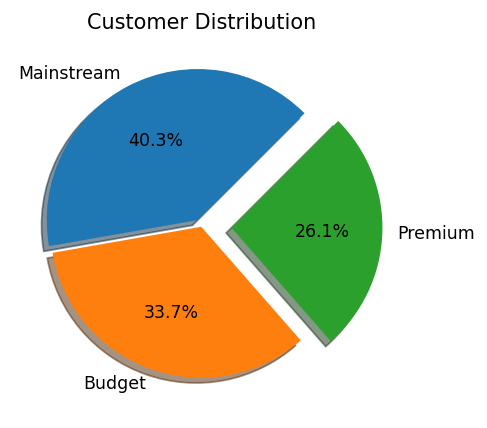

In [ ]:
plt.figure(dpi=125)
plt.title("Customer Distribution")
plt.pie(purchase.PREMIUM_CUSTOMER.value_counts(),labels=purchase.PREMIUM_CUSTOMER.value_counts().index,
        autopct='%.1f%%',shadow=True,
        explode=[0.05,0,.2],startangle=45)
plt.show()

### 26.1% are Premium Member

# 

In [ ]:
purchase.LIFESTAGE.value_counts()

RETIREES                  14805
OLDER SINGLES/COUPLES     14609
YOUNG SINGLES/COUPLES     14441
OLDER FAMILIES             9780
YOUNG FAMILIES             9178
MIDAGE SINGLES/COUPLES     7275
NEW FAMILIES               2549
Name: LIFESTAGE, dtype: int64

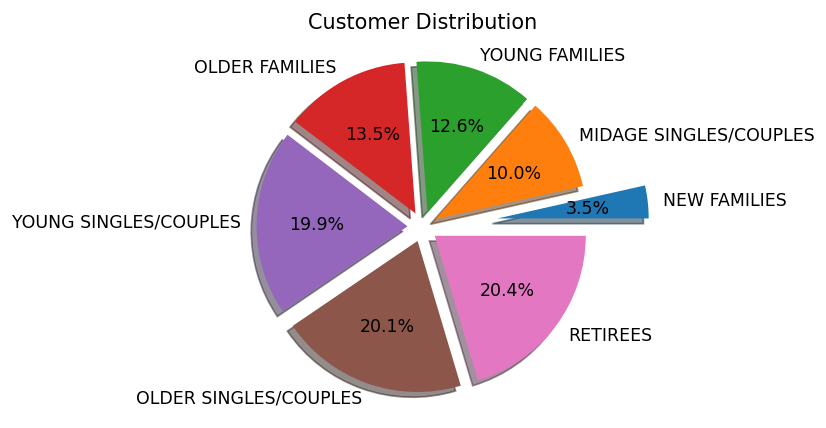

In [ ]:
plt.figure(dpi=125)
plt.title("Customer Distribution")
plt.pie(purchase.LIFESTAGE.value_counts().sort_values(),labels=purchase.LIFESTAGE.value_counts().sort_values().index,
        autopct='%.1f%%',shadow=True,
        explode=[0.5,.1,.1,.1,.1,.1,.1],startangle=0,)
plt.show()

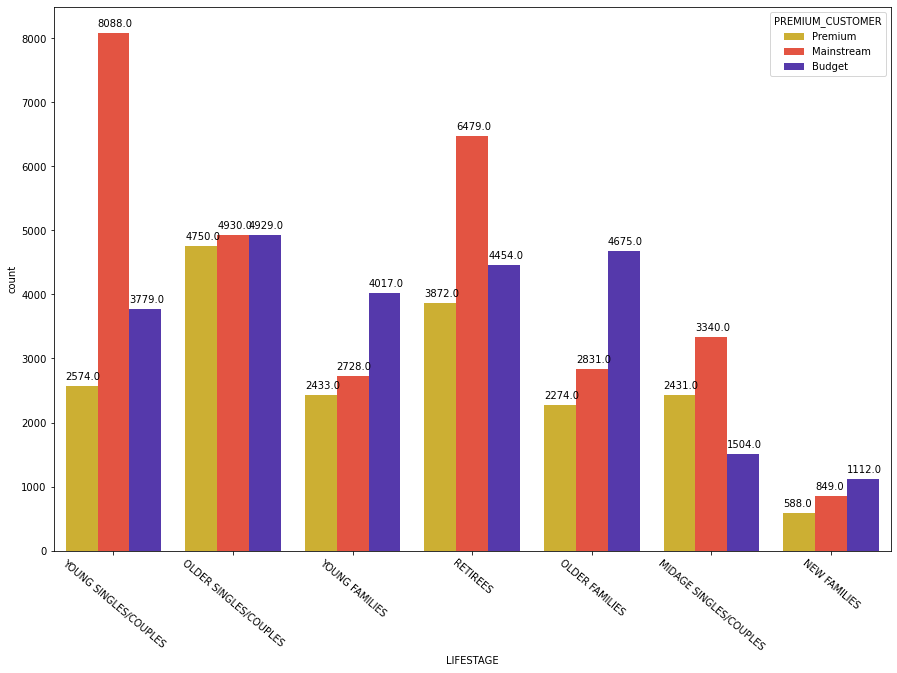

In [ ]:
plt.figure(figsize=[15,10])
ax=sns.countplot(x='LIFESTAGE',data=purchase.sort_values(by="PREMIUM_CUSTOMER",ascending=False),hue='PREMIUM_CUSTOMER',palette='CMRmap_r')
plt.xticks(rotation=320)
for p in ax.patches:
    ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()+100))
plt.show()

# 

# reading transaction file

# 

In [ ]:
transac=pd.read_csv("QVI_transaction_data.csv")

In [ ]:
transac[transac.duplicated()]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
124845,43374,107,107024,108462,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0


In [ ]:
transac.drop_duplicates(inplace=True)

In [ ]:
transac.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [ ]:
excel_date = '43390'
excel_date = int(excel_date)
python_date = pd.to_datetime('1900-01-01') + timedelta(excel_date-2)

print(python_date)

2018-10-17 00:00:00


In [ ]:
def date(DATE):
    excel_date = int(DATE)
    return (pd.to_datetime('1900-01-01') + timedelta(excel_date-2))
    

In [ ]:
transac["date"]=transac.apply(lambda x:date(x['DATE']),axis=1)

In [ ]:
transac.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 264835 entries, 0 to 264835
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264835 non-null  int64         
 1   STORE_NBR       264835 non-null  int64         
 2   LYLTY_CARD_NBR  264835 non-null  int64         
 3   TXN_ID          264835 non-null  int64         
 4   PROD_NBR        264835 non-null  int64         
 5   PROD_NAME       264835 non-null  object        
 6   PROD_QTY        264835 non-null  int64         
 7   TOT_SALES       264835 non-null  float64       
 8   date            264835 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(6), object(1)
memory usage: 20.2+ MB


In [ ]:
transac=transac.drop(columns="DATE",axis=1)

In [ ]:
transac.head()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,date
0,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-17
1,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05-14
2,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019-05-20
3,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018-08-17
4,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2018-08-18


In [ ]:
transac.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264835.000000,2.648350e+05,2.648350e+05,264835.000000,264835.000000,264835.000000
mean,135.080216,1.355496e+05,1.351584e+05,56.583201,1.907308,7.304205
std,76.784306,8.058011e+04,7.813316e+04,32.826692,0.643655,3.083231
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.000000,7.002100e+04,6.760100e+04,28.000000,2.000000,5.400000
50%,130.000000,1.303580e+05,1.351380e+05,56.000000,2.000000,7.400000
75%,203.000000,2.030945e+05,2.027015e+05,85.000000,2.000000,9.200000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [ ]:
transac[(transac.PROD_QTY > 5)]

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,date
69762,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0,2018-08-19
69763,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0,2019-05-20


# Here we Find A outlier-
### A same card no. 226000 placed a bulk order from a same store no. 226  with a Quantity of 200
### so its is not a regular consumer he/she is a shopkeeper who purchase for there shop
### so we are delete this card number so that we can do proper analysis

In [ ]:
new_tran=transac[~(transac.PROD_QTY > 5)]

In [ ]:
new_tran

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,date
0,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-17
1,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05-14
2,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019-05-20
3,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018-08-17
4,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2018-08-18
...,...,...,...,...,...,...,...,...
264831,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8,2019-03-09
264832,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4,2018-08-13
264833,272,272379,270187,51,Doritos Mexicana 170g,2,8.8,2018-11-06
264834,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8,2018-12-27


In [ ]:
new_tran.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264833.000000,2.648330e+05,2.648330e+05,264833.000000,264833.000000,264833.000000
mean,135.079529,1.355489e+05,1.351577e+05,56.583598,1.905812,7.299351
std,76.784189,8.058003e+04,7.813305e+04,32.826498,0.343437,2.527244
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,70.000000,7.002100e+04,6.760000e+04,28.000000,2.000000,5.400000
50%,130.000000,1.303570e+05,1.351370e+05,56.000000,2.000000,7.400000
75%,203.000000,2.030940e+05,2.027000e+05,85.000000,2.000000,9.200000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000


In [ ]:
new_tran.sort_values(by="TOT_SALES",ascending=False)

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,date
55558,190,190113,190914,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,2019-05-14
5179,94,94148,93390,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,2018-08-15
117850,194,194308,194516,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,2019-05-19
150683,118,118021,120799,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,2019-05-20
184969,44,44350,40394,14,Smiths Crnkle Chip Orgnl Big Bag 380g,5,29.5,2019-05-20
...,...,...,...,...,...,...,...,...
204061,41,41280,38218,35,Woolworths Mild Salsa 300g,1,1.5,2019-05-16
172293,265,265335,263676,35,Woolworths Mild Salsa 300g,1,1.5,2018-08-14
149440,254,254180,254267,76,Woolworths Medium Salsa 300g,1,1.5,2019-01-18
185478,241,241014,244643,76,Woolworths Medium Salsa 300g,1,1.5,2019-05-20


In [ ]:
new_tran[new_tran.TOT_SALES>10]

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,date
3,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018-08-17
4,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2018-08-18
11,8,8294,8221,114,Kettle Sensations Siracha Lime 150g,5,23.0,2018-08-20
31,43,43227,40186,26,Pringles Sweet&Spcy BBQ 134g,4,14.8,2019-05-15
56,74,74336,73182,84,GrnWves Plus Btroot & Chilli Jam 180g,5,15.5,2019-05-16
...,...,...,...,...,...,...,...,...
264797,270,270079,267146,20,Doritos Cheese Supreme 330g,2,11.4,2018-09-02
264807,271,271013,268302,4,Dorito Corn Chp Supreme 380g,2,13.0,2019-01-19
264819,272,272053,269703,46,Kettle Original 175g,2,10.8,2019-06-15
264821,272,272105,269792,32,Kettle Sea Salt And Vinegar 175g,2,10.8,2019-05-29


In [ ]:
txn_date=pd.pivot_table(index="date",values="TXN_ID",aggfunc="count",data=new_tran)

In [ ]:
txn_date

,TXN_ID
date,
2018-07-01,724
2018-07-02,711
2018-07-03,722
2018-07-04,714
2018-07-05,712
...,...
2019-06-26,723
2019-06-27,709
2019-06-28,730


In [ ]:
txn_date_1=pd.DataFrame(txn_date)

In [ ]:
txn_date_1.TXN_ID.sort_values(ascending=False)

date
2018-12-24    939
2018-12-23    917
2018-12-22    915
2018-12-19    906
2018-12-18    862
             ... 
2018-12-12    664
2019-06-24    662
2019-06-13    659
2018-10-18    658
2018-11-25    648
Name: TXN_ID, Length: 364, dtype: int64

<AxesSubplot:xlabel='date'>

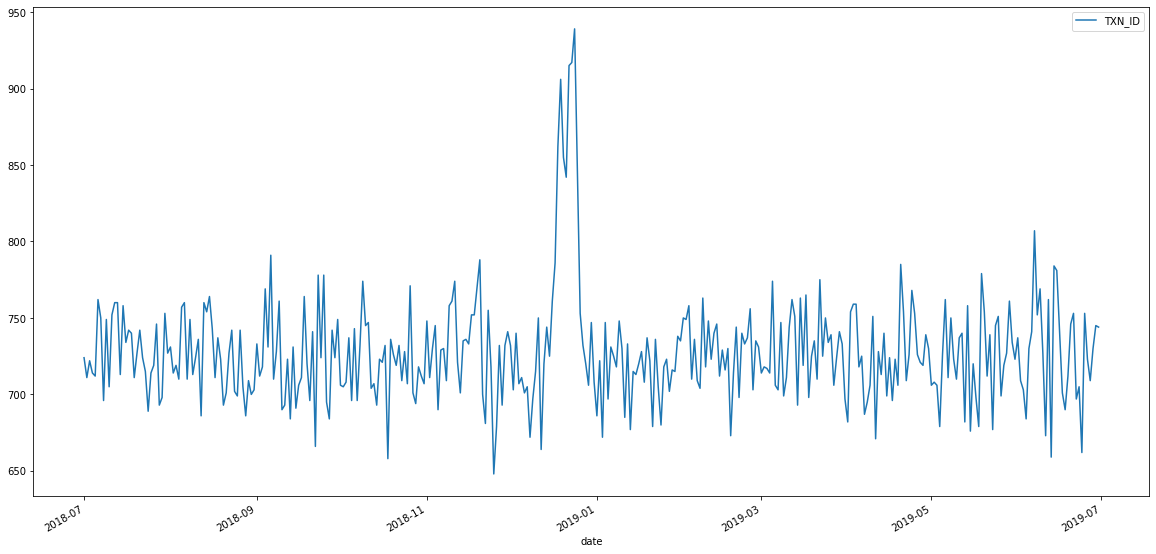

In [ ]:
pd.pivot_table(index="date",values="TXN_ID",aggfunc="count",data=new_tran).plot(figsize=[20,10])

# From the following Diagram we can see there is a jump on the sale before the 25-Dec 

# 

In [ ]:
chips=new_tran[~(new_tran.PROD_NAME=="Woolworths Medium   Salsa 300g")]
chips.head()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,date
0,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-17
1,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,2019-05-14
2,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,2019-05-20
3,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,2018-08-17
4,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,2018-08-18


we only want chips so we are removing all other products

In [ ]:
len(chips)

263403

In [ ]:
chips.PROD_NAME.value_counts(ascending=False)

Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
Sunbites Whlegrn    Crisps Frch/Onin 90g    1432
RRD Pc Sea Salt     165g                    1431
NCC Sour Cream &    Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: PROD_NAME, Length: 113, dtype: int64

In [ ]:
pd.pivot_table(index="PROD_NAME",values="TXN_ID",aggfunc="count",data=chips)

,TXN_ID
PROD_NAME,
Burger Rings 220g,1564
CCs Nacho Cheese 175g,1498
CCs Original 175g,1514
CCs Tasty Cheese 175g,1539
Cheetos Chs & Bacon Balls 190g,1479
...,...
WW Original Stacked Chips 160g,1487
WW Sour Cream &OnionStacked Chips 160g,1483
WW Supreme Cheese Corn Chips 200g,1509


# Merging Both Files

In [ ]:
merge=pd.merge(purchase, chips, on='LYLTY_CARD_NBR', how='inner')

In [ ]:
merge

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,date
0,1000,YOUNG SINGLES/COUPLES,Premium,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-17
1,1002,YOUNG SINGLES/COUPLES,Mainstream,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,2018-09-16
2,1003,YOUNG FAMILIES,Budget,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,2019-03-07
3,1003,YOUNG FAMILIES,Budget,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,2019-03-08
4,1004,OLDER SINGLES/COUPLES,Mainstream,1,5,96,WW Original Stacked Chips 160g,1,1.9,2018-11-02
...,...,...,...,...,...,...,...,...,...,...
263398,2370701,YOUNG FAMILIES,Mainstream,88,240378,24,Grain Waves Sweet Chilli 210g,2,7.2,2018-12-08
263399,2370751,YOUNG FAMILIES,Premium,88,240394,60,Kettle Tortilla ChpsFeta&Garlic 150g,2,9.2,2018-10-01
263400,2370961,OLDER FAMILIES,Budget,88,240480,70,Tyrrells Crisps Lightly Salted 165g,2,8.4,2018-10-24
263401,2370961,OLDER FAMILIES,Budget,88,240481,65,Old El Paso Salsa Dip Chnky Tom Ht300g,2,10.2,2018-10-27


In [ ]:
merge.isna().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
STORE_NBR           0
TXN_ID              0
PROD_NBR            0
PROD_NAME           0
PROD_QTY            0
TOT_SALES           0
date                0
dtype: int64

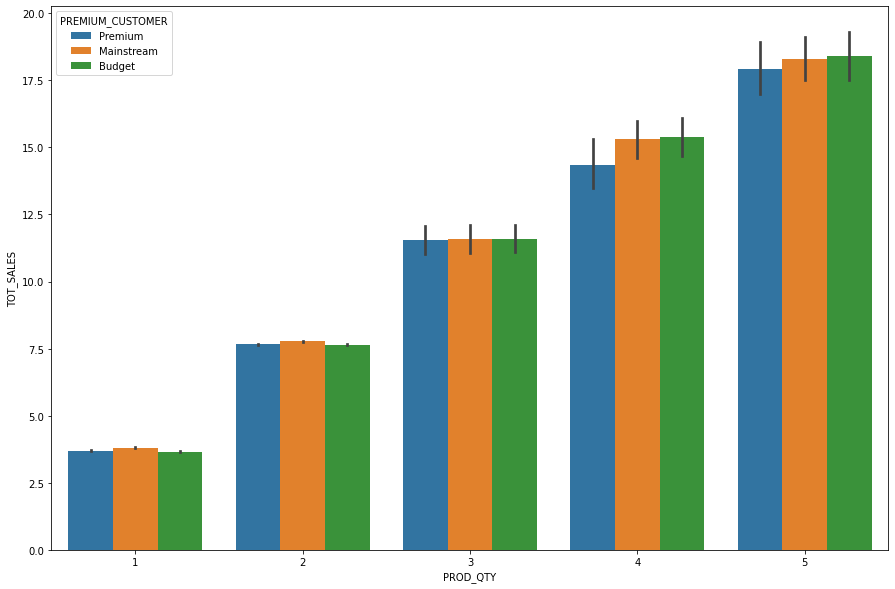

In [ ]:
plt.figure(figsize=[15,10])
sns.barplot(x="PROD_QTY",y="TOT_SALES",data=merge,hue="PREMIUM_CUSTOMER")
plt.show()

In [ ]:
merge.PROD_NAME.unique()

array(['Natural Chip        Compny SeaSalt175g',
       'Red Rock Deli Chikn&Garlic Aioli 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Natural ChipCo      Hony Soy Chckn175g',
       'WW Original Stacked Chips 160g', 'Cheetos Puffs 165g',
       'Infuzions SourCream&Herbs Veg Strws 110g',
       'RRD SR Slow Rst     Pork Belly 150g',
       'Doritos Cheese      Supreme 330g', 'Doritos Mexicana    170g',
       'Old El Paso Salsa   Dip Tomato Med 300g',
       'GrnWves Plus Btroot & Chilli Jam 180g',
       'Smiths Crinkle Cut  Chips Barbecue 170g',
       'Kettle Sensations   Camembert & Fig 150g',
       'Doritos Corn Chip Southern Chicken 150g',
       'CCs Tasty Cheese    175g', 'Tostitos Splash Of  Lime 175g',
       'Kettle 135g Swt Pot Sea Salt', 'RRD Salt & Vinegar  165g',
       'Infuzions Mango     Chutny Papadums 70g',
       'Smiths Crinkle Cut  Snag&Sauce 150g',
       'Smiths Crinkle      Original 330g',
       'RRD Sweet Chilli &  Sour Cream 165g',
     

# Creating New Coloumn for Brand Name

In [ ]:
def split(PROD_NAME):
    a=str(PROD_NAME)
    return a.split()[0]

In [ ]:
merge["Brand"]=merge.apply(lambda x:split(x['PROD_NAME']),axis=1)

### Some Brand has same name with Difrrent spelling , So correccting these Spellings

In [ ]:
merge.Brand.replace({"RRD":"Red"},inplace=True)

In [ ]:
merge.Brand.replace({"WW":"Woolworths"},inplace=True)

In [ ]:
merge.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,date,Brand
0,1000,YOUNG SINGLES/COUPLES,Premium,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-17,Natural
1,1002,YOUNG SINGLES/COUPLES,Mainstream,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,2018-09-16,Red
2,1003,YOUNG FAMILIES,Budget,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,2019-03-07,Grain
3,1003,YOUNG FAMILIES,Budget,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,2019-03-08,Natural
4,1004,OLDER SINGLES/COUPLES,Mainstream,1,5,96,WW Original Stacked Chips 160g,1,1.9,2018-11-02,Woolworths


# 

# Creating Coloumn for Size

In [ ]:
def split(PROD_NAME):
    a=str(PROD_NAME)
    return a[-4:-1:1]

In [ ]:
merge["Quantity_gm"]=merge.apply(lambda x:split(x['PROD_NAME']),axis=1)

In [ ]:
merge.Quantity_gm.replace({"Sal":135},inplace=True)

# 

# 

# creating new coloumn for Average sales

In [ ]:
merge["average_sales"]=merge.TOT_SALES/merge.PROD_QTY

In [ ]:
merge.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,date,Brand,Quantity_gm,average_sales
0,1000,YOUNG SINGLES/COUPLES,Premium,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,2018-10-17,Natural,175,3.0
1,1002,YOUNG SINGLES/COUPLES,Mainstream,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,2018-09-16,Red,150,2.7
2,1003,YOUNG FAMILIES,Budget,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,2019-03-07,Grain,210,3.6
3,1003,YOUNG FAMILIES,Budget,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,2019-03-08,Natural,175,3.0
4,1004,OLDER SINGLES/COUPLES,Mainstream,1,5,96,WW Original Stacked Chips 160g,1,1.9,2018-11-02,Woolworths,160,1.9


# 

In [ ]:
a=pd.pivot_table(index=["PREMIUM_CUSTOMER","LIFESTAGE"],
                 values=['PROD_QTY','TOT_SALES'],data=merge,aggfunc="sum").sort_values(by=['TOT_SALES'],ascending=False)

In [ ]:
a[:5]

PROD_QTY  TOT_SALES
PREMIUM_CUSTOMER LIFESTAGE                                 
Budget           OLDER FAMILIES            44782  167938.75
Mainstream       YOUNG SINGLES/COUPLES     38547  157494.10
                 RETIREES                  40262  155293.05
Budget           YOUNG FAMILIES            36894  139020.35
                 OLDER SINGLES/COUPLES     35040  136499.80

<AxesSubplot:xlabel='PREMIUM_CUSTOMER,LIFESTAGE'>

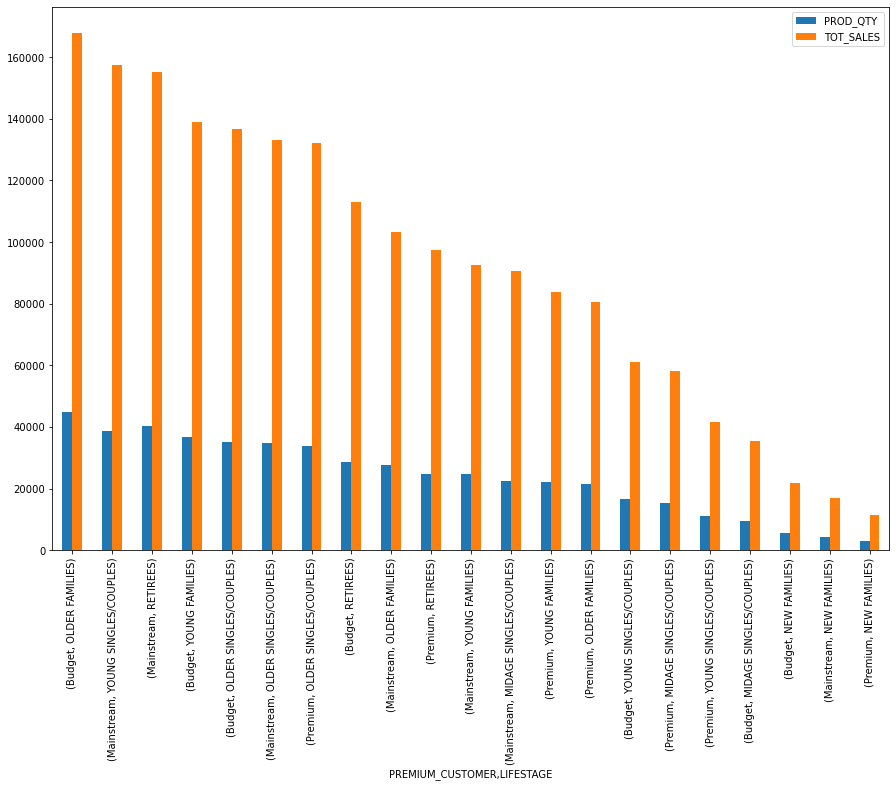

In [ ]:
a.plot(kind="bar",figsize=[15,10])

## From above we can Say Budget Customer with OLDER FAMILIES and Mainstream	YOUNG SINGLES/COUPLES spend most generating total sale of 167938.75 & 157494.10

## and Premium	Customer with NEW FAMILIES spend least generating total sale of 11474.60

# 

In [ ]:
pd.pivot_table(index=["PREMIUM_CUSTOMER"],values=['PROD_QTY','TOT_SALES'],
                 data=merge,aggfunc="sum").sort_values(by=['PROD_QTY','TOT_SALES'],ascending=False)

,PROD_QTY,TOT_SALES
PREMIUM_CUSTOMER,,
Mainstream,192983,749271.50
Budget,176922,674747.55
Premium,132117,505039.95


## From Above Max sales is generated by Mainstream customers

# 

In [ ]:
pd.pivot_table(index=["LIFESTAGE"],values=['PROD_QTY','TOT_SALES'],
                 data=merge,aggfunc="sum").sort_values(by=['PROD_QTY','TOT_SALES'],ascending=False)

,PROD_QTY,TOT_SALES
LIFESTAGE,,
OLDER SINGLES/COUPLES,103679,401637.75
OLDER FAMILIES,94015,351601.70
RETIREES,93667,365722.40
YOUNG FAMILIES,84038,315375.60
YOUNG SINGLES/COUPLES,66344,259970.30
MIDAGE SINGLES/COUPLES,47467,184370.30
NEW FAMILIES,12812,50380.95


## From Above OLDER SINGLES/COUPLES generate max sales

# 

In [ ]:
merge.LIFESTAGE.value_counts()

OLDER SINGLES/COUPLES     54206
RETIREES                  49497
OLDER FAMILIES            48293
YOUNG FAMILIES            43325
YOUNG SINGLES/COUPLES     36210
MIDAGE SINGLES/COUPLES    24973
NEW FAMILIES               6899
Name: LIFESTAGE, dtype: int64

In [ ]:
merge.PREMIUM_CUSTOMER.value_counts()

Mainstream    101471
Budget         92637
Premium        69295
Name: PREMIUM_CUSTOMER, dtype: int64

In [ ]:
pd.pivot_table(index=["Brand"],
                 values=['TOT_SALES'],data=merge,aggfunc="sum").sort_values(by="TOT_SALES",ascending=False)[:5]

,TOT_SALES
Brand,
Kettle,390239.8
Smiths,210070.8
Doritos,201538.9
Pringles,177655.5
Red,95046.0


# Top 5 brands with Most Sum of sales

# 

In [ ]:
b=pd.pivot_table(index=["Brand","Quantity_gm"],
                 values=['TOT_SALES'],data=merge,aggfunc="sum").sort_values(by="TOT_SALES",ascending=False)
b[:5]

,,TOT_SALES
Brand,Quantity_gm,
Kettle,175,196668.0
Pringles,134,177655.5
Kettle,150,167481.4
Doritos,170,106264.4
Old,300,90785.1


In [ ]:
c=pd.pivot_table(index=["Quantity_gm"],
                 values=['TOT_SALES'],data=merge,aggfunc="sum").sort_values(by="TOT_SALES",ascending=False)
c[:5]

,TOT_SALES
Quantity_gm,
175,485431.4
150,304288.5
134,177655.5
110,162765.4
170,146673.0


<AxesSubplot:xlabel='Brand,Quantity_gm'>

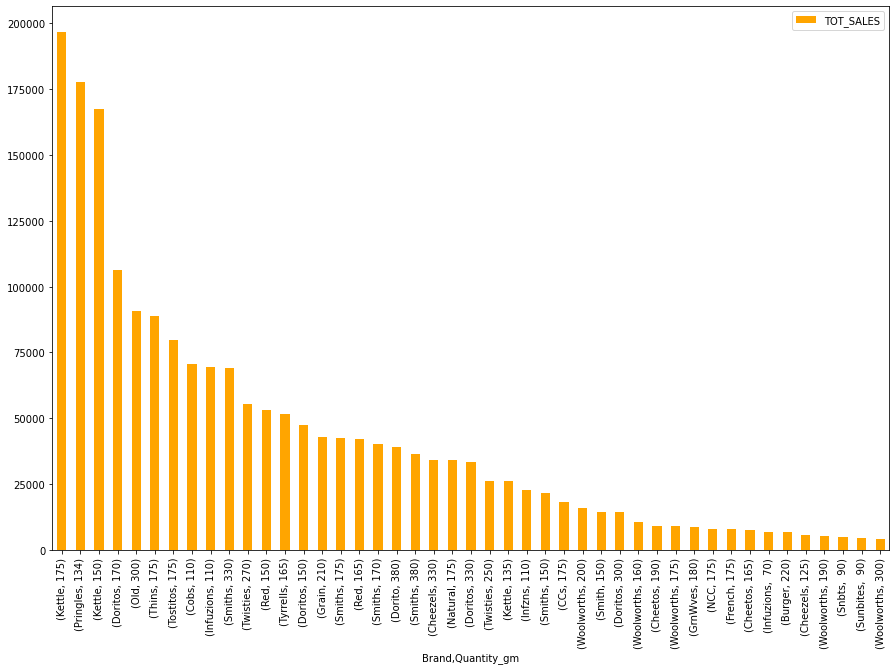

In [ ]:
b.plot(kind="bar",figsize=[15,10],color="orange")

## from above we can say Kettle 175gm pack generate max sales

# 

In [ ]:
group=merge.groupby(["LIFESTAGE","PREMIUM_CUSTOMER"])

In [ ]:
df1=group.agg({"LYLTY_CARD_NBR":"count",
           "STORE_NBR":"count",
           "TXN_ID":"count",
           "PROD_NBR":"count",
           "PROD_QTY":"sum",
           "TOT_SALES":"sum"}
)

In [ ]:
df2=pd.DataFrame(df1)

In [ ]:
df2

LYLTY_CARD_NBR  STORE_NBR  TXN_ID  \
LIFESTAGE              PREMIUM_CUSTOMER                                      
MIDAGE SINGLES/COUPLES Budget                      4991       4991    4991   
                       Mainstream                 11824      11824   11824   
                       Premium                     8158       8158    8158   
NEW FAMILIES           Budget                      2997       2997    2997   
                       Mainstream                  2319       2319    2319   
                       Premium                     1583       1583    1583   
OLDER FAMILIES         Budget                     23015      23015   23015   
                       Mainstream                 14155      14155   14155   
                       Premium                    11123      11123   11123   
OLDER SINGLES/COUPLES  Budget                     18312      18312   18312   
                       Mainstream                 18223      18223   18223   
                       Premium                    17671      17671   17671   
RETIREES               Budget                     15140      15140   15140   
                       Mainstream                 21328      21328   21328   
                       Premium                    13029      13029   13029   
YOUNG FAMILIES         Budget                     19011      19011   19011   
                       Mainstream                 12815      12815   12815   
                       Premium                    11499      11499   11499   
YOUNG SINGLES/COUPLES  Budget                      9171       9171    9171   
                       Mainstream                 20807      20807   20807   
                       Premium                     6232       6232    6232   

                                         PROD_NBR  PROD_QTY  TOT_SALES  
LIFESTAGE              PREMIUM_CUSTOMER                                 
MIDAGE SINGLES/COUPLES Budget                4991      9446   35439.80  
                       Mainstream           11824     22603   90659.85  
                       Premium               8158     15418   58270.65  
NEW FAMILIES           Budget                2997      5558   21908.95  
                       Mainstream            2319      4308   16997.40  
                       Premium               1583      2946   11474.60  
OLDER FAMILIES         Budget               23015     44782  167938.75  
                       Mainstream           14155     27585  103189.05  
                       Premium              11123     21648   80473.90  
OLDER SINGLES/COUPLES  Budget               18312     35040  136499.80  
                       Mainstream           18223     34812  133116.30  
                       Premium              17671     33827  132021.65  
RETIREES               Budget               15140     28651  112978.30  
                       Mainstream           21328     40262  155293.05  
                       Premium              13029     24754   97451.05  
YOUNG FAMILIES         Budget               19011     36894  139020.35  
                       Mainstream           12815     24866   92521.75  
                       Premium              11499     22278   83833.50  
YOUNG SINGLES/COUPLES  Budget                9171     16551   60961.60  
                       Mainstream           20807     38547  157494.10  
                       Premium               6232     11246   41514.60

In [ ]:
df2.reset_index(inplace=True)


In [ ]:
df2

,LIFESTAGE,PREMIUM_CUSTOMER,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
0,MIDAGE SINGLES/COUPLES,Budget,4991,4991,4991,4991,9446,35439.80
1,MIDAGE SINGLES/COUPLES,Mainstream,11824,11824,11824,11824,22603,90659.85
2,MIDAGE SINGLES/COUPLES,Premium,8158,8158,8158,8158,15418,58270.65
3,NEW FAMILIES,Budget,2997,2997,2997,2997,5558,21908.95
4,NEW FAMILIES,Mainstream,2319,2319,2319,2319,4308,16997.40
5,NEW FAMILIES,Premium,1583,1583,1583,1583,2946,11474.60
6,OLDER FAMILIES,Budget,23015,23015,23015,23015,44782,167938.75
7,OLDER FAMILIES,Mainstream,14155,14155,14155,14155,27585,103189.05
8,OLDER FAMILIES,Premium,11123,11123,11123,11123,21648,80473.90
9,OLDER SINGLES/COUPLES,Budget,18312,18312,18312,18312,35040,136499.80


In [ ]:
df2["average_sales"]=(df2.TOT_SALES/df2.PROD_QTY).round(2)

In [ ]:
df2["average_unit"]=(df2.PROD_QTY/df2.TXN_ID).round(2)

In [ ]:
df2

,LIFESTAGE,PREMIUM_CUSTOMER,LYLTY_CARD_NBR,STORE_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,average_sales,average_unit
0,MIDAGE SINGLES/COUPLES,Budget,4991,4991,4991,4991,9446,35439.80,3.75,1.89
1,MIDAGE SINGLES/COUPLES,Mainstream,11824,11824,11824,11824,22603,90659.85,4.01,1.91
2,MIDAGE SINGLES/COUPLES,Premium,8158,8158,8158,8158,15418,58270.65,3.78,1.89
3,NEW FAMILIES,Budget,2997,2997,2997,2997,5558,21908.95,3.94,1.85
4,NEW FAMILIES,Mainstream,2319,2319,2319,2319,4308,16997.40,3.95,1.86
5,NEW FAMILIES,Premium,1583,1583,1583,1583,2946,11474.60,3.89,1.86
6,OLDER FAMILIES,Budget,23015,23015,23015,23015,44782,167938.75,3.75,1.95
7,OLDER FAMILIES,Mainstream,14155,14155,14155,14155,27585,103189.05,3.74,1.95
8,OLDER FAMILIES,Premium,11123,11123,11123,11123,21648,80473.90,3.72,1.95
9,OLDER SINGLES/COUPLES,Budget,18312,18312,18312,18312,35040,136499.80,3.90,1.91


In [ ]:
df3=df2.drop(columns=["LYLTY_CARD_NBR","STORE_NBR","PROD_NBR"],axis=1)


In [ ]:
df3.rename(columns={"TXN_ID":"TXN_ID_COUNT"},inplace=True)

In [ ]:
df3.head()

,LIFESTAGE,PREMIUM_CUSTOMER,TXN_ID_COUNT,PROD_QTY,TOT_SALES,average_sales,average_unit
0,MIDAGE SINGLES/COUPLES,Budget,4991,9446,35439.80,3.75,1.89
1,MIDAGE SINGLES/COUPLES,Mainstream,11824,22603,90659.85,4.01,1.91
2,MIDAGE SINGLES/COUPLES,Premium,8158,15418,58270.65,3.78,1.89
3,NEW FAMILIES,Budget,2997,5558,21908.95,3.94,1.85
4,NEW FAMILIES,Mainstream,2319,4308,16997.40,3.95,1.86


In [ ]:
df3.sort_values(by="average_sales",ascending=False)[:5]

,LIFESTAGE,PREMIUM_CUSTOMER,TXN_ID_COUNT,PROD_QTY,TOT_SALES,average_sales,average_unit
19,YOUNG SINGLES/COUPLES,Mainstream,20807,38547,157494.10,4.09,1.85
1,MIDAGE SINGLES/COUPLES,Mainstream,11824,22603,90659.85,4.01,1.91
4,NEW FAMILIES,Mainstream,2319,4308,16997.40,3.95,1.86
14,RETIREES,Premium,13029,24754,97451.05,3.94,1.90
3,NEW FAMILIES,Budget,2997,5558,21908.95,3.94,1.85


In [ ]:
df3.sort_values(by="average_unit",ascending=False)[:6]

,LIFESTAGE,PREMIUM_CUSTOMER,TXN_ID_COUNT,PROD_QTY,TOT_SALES,average_sales,average_unit
6,OLDER FAMILIES,Budget,23015,44782,167938.75,3.75,1.95
7,OLDER FAMILIES,Mainstream,14155,27585,103189.05,3.74,1.95
8,OLDER FAMILIES,Premium,11123,21648,80473.90,3.72,1.95
17,YOUNG FAMILIES,Premium,11499,22278,83833.50,3.76,1.94
16,YOUNG FAMILIES,Mainstream,12815,24866,92521.75,3.72,1.94
15,YOUNG FAMILIES,Budget,19011,36894,139020.35,3.77,1.94


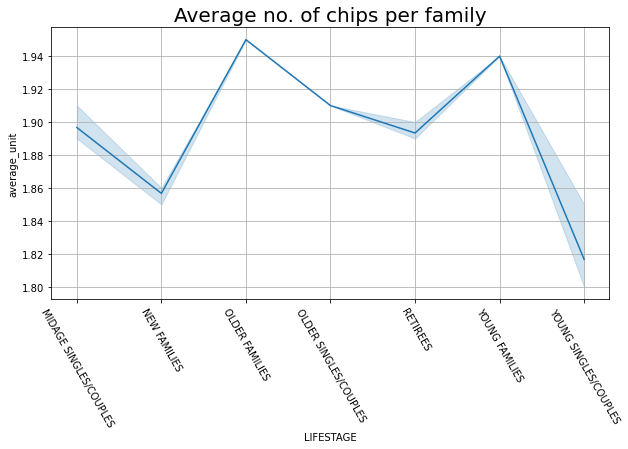

In [ ]:
plt.figure(figsize=[10,5])
plt.title("Average no. of chips per family",fontsize=20)
sns.lineplot(x="LIFESTAGE",y="average_unit",data=df3)
plt.xticks(rotation=300)
plt.grid()


### From Above we can Say OLDER FAMILIES & 	YOUNG FAMILIES	 buys more chips

# 

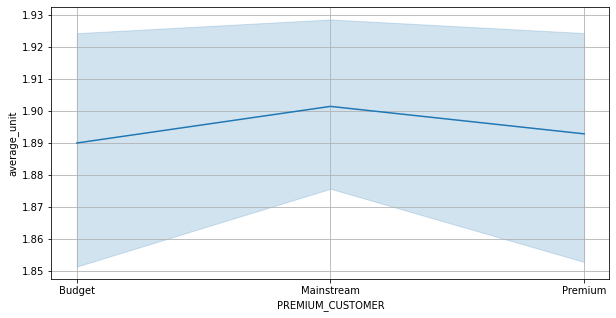

In [ ]:
plt.figure(figsize=[10,5])
sns.lineplot(x="PREMIUM_CUSTOMER",y="average_unit",data=df3)
plt.grid()

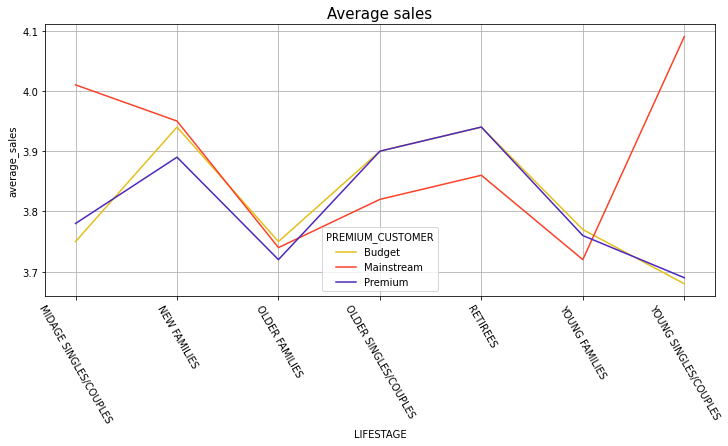

In [ ]:
plt.figure(figsize=[12,5])
plt.title("Average sales",fontsize=15)
sns.lineplot(x="LIFESTAGE",y="average_sales",data=df3,hue="PREMIUM_CUSTOMER",palette="CMRmap_r")
plt.xticks(rotation=300)

plt.grid()


## Mainstream midage and young singles and couples are more willing to pay more per packet of chips compared to their budget and premium counterparts.

# 

In [ ]:
df3.sort_values(by="LIFESTAGE",ascending=False)

,LIFESTAGE,PREMIUM_CUSTOMER,TXN_ID_COUNT,PROD_QTY,TOT_SALES,average_sales,average_unit
20,YOUNG SINGLES/COUPLES,Premium,6232,11246,41514.60,3.69,1.80
19,YOUNG SINGLES/COUPLES,Mainstream,20807,38547,157494.10,4.09,1.85
18,YOUNG SINGLES/COUPLES,Budget,9171,16551,60961.60,3.68,1.80
17,YOUNG FAMILIES,Premium,11499,22278,83833.50,3.76,1.94
16,YOUNG FAMILIES,Mainstream,12815,24866,92521.75,3.72,1.94
15,YOUNG FAMILIES,Budget,19011,36894,139020.35,3.77,1.94
14,RETIREES,Premium,13029,24754,97451.05,3.94,1.90
13,RETIREES,Mainstream,21328,40262,155293.05,3.86,1.89
12,RETIREES,Budget,15140,28651,112978.30,3.94,1.89
11,OLDER SINGLES/COUPLES,Premium,17671,33827,132021.65,3.90,1.91


In [ ]:
valuable=merge[(merge.PREMIUM_CUSTOMER=="Mainstream") & (merge.LIFESTAGE=="YOUNG SINGLES/COUPLES")]

In [ ]:
valuable.Brand.value_counts()[:5]

Kettle      3844
Pringles    2315
Doritos     2238
Smiths      1857
Thins       1166
Name: Brand, dtype: int64

In [ ]:
valuable.Quantity_gm.value_counts()[:5]

175    4997
150    3241
134    2315
110    2051
170    1575
Name: Quantity_gm, dtype: int64

## They are our  target customer segments that contribute the most to sales.

# From Above Mainstream  YOUNG SINGLES/COUPLES tends to buy Kettle brands more and Pack size of 175 is most selling among all of them

# 

In [ ]:
valuable1=merge[(merge.PREMIUM_CUSTOMER=="Mainstream") & (merge.LIFESTAGE=="MIDAGE SINGLES/COUPLES")]

In [ ]:
valuable1.Brand.value_counts()[:5]

Kettle      2136
Smiths      1237
Pringles    1159
Doritos     1153
Red          655
Name: Brand, dtype: int64

In [ ]:
valuable1.Quantity_gm.value_counts()[:5]

175    2975
150    1882
134    1159
110    1124
170     882
Name: Quantity_gm, dtype: int64

# From Above Mainstream  MIDAGE SINGLES/COUPLES tends to buy Kettle brands more and Pack size of 175 is most selling among all of them